In [3]:
from xml.dom import minidom
import numpy as np
import heapq
import random
import matplotlib.pyplot as plt

In [63]:
data = minidom.parse('./bayg29.xml')
#parameters
initialPopulationCount=2000
numberOfCities=29
crossoverPossibility=0.95
mutationPossibility=0.15
maxFrozenIteration=75
elitismSetSize=25
tournamentSize=5


In [38]:
costs=[]
vertices=data.getElementsByTagName('vertex')
for vertex in vertices:
    cost=[]
    for edge in vertex.getElementsByTagName('edge'):
        if len(cost)==len(costs):
            cost.append(0);
        cost.append(float(edge.getAttribute('cost')))
    costs.append(cost)

        

In [39]:
#visualize distances in a DataFrame
from pandas import DataFrame
df=DataFrame(costs)
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.0,97.0,205.0,139.0,86.0,60.0,220.0,65.0,111.0,115.0,...,120.0,58.0,257.0,152.0,52.0,180.0,136.0,82.0,34.0,145.0
1,97.0,0.0,129.0,103.0,71.0,105.0,258.0,154.0,112.0,65.0,...,49.0,41.0,211.0,226.0,116.0,197.0,89.0,153.0,124.0,74.0
2,205.0,129.0,0.0,219.0,125.0,175.0,386.0,269.0,134.0,184.0,...,160.0,151.0,300.0,350.0,239.0,322.0,78.0,276.0,220.0,60.0
3,139.0,103.0,219.0,0.0,167.0,182.0,180.0,162.0,208.0,39.0,...,60.0,120.0,119.0,192.0,114.0,110.0,192.0,136.0,173.0,173.0
4,86.0,71.0,125.0,167.0,0.0,51.0,296.0,150.0,42.0,131.0,...,119.0,50.0,281.0,238.0,131.0,244.0,51.0,166.0,95.0,69.0
5,60.0,105.0,175.0,182.0,51.0,0.0,279.0,114.0,56.0,150.0,...,146.0,67.0,300.0,205.0,111.0,238.0,98.0,139.0,52.0,120.0
6,220.0,258.0,386.0,180.0,296.0,279.0,0.0,178.0,328.0,206.0,...,231.0,249.0,209.0,111.0,169.0,72.0,338.0,144.0,237.0,331.0
7,65.0,154.0,269.0,162.0,150.0,114.0,178.0,0.0,169.0,151.0,...,165.0,121.0,270.0,91.0,48.0,158.0,200.0,39.0,64.0,210.0
8,111.0,112.0,134.0,208.0,42.0,56.0,328.0,169.0,0.0,172.0,...,160.0,90.0,322.0,260.0,160.0,281.0,57.0,192.0,107.0,90.0
9,115.0,65.0,184.0,39.0,131.0,150.0,206.0,151.0,172.0,0.0,...,25.0,85.0,152.0,200.0,104.0,139.0,154.0,134.0,149.0,135.0


In [52]:
def fitness(permutation):
    totalCost=0
    for i in range(1,len(permutation)):
        totalCost+=costs[permutation[i-1]][permutation[i]]
    totalCost+=costs[permutation[-1]][permutation[0]]
    return -totalCost

def getInitialPopulation(size,count):
    return [np.random.permutation(size).tolist() for i in range(count)]

def choose(population,count):
    return heapq.nlargest(count,population,key=fitness) # better performance than sorting...

def swapMutation(chromosome):
    if random.random()>mutationPossibility : return chromosome
    a=int(random.random()*len(chromosome))
    b=int(random.random()*len(chromosome))
    (chromosome[a],chromosome[b])=(chromosome[b],chromosome[a])
    return chromosome

def inverseMutation(chromosome):
    if random.random()>mutationPossibility : return chromosome
    a=int(random.random()*len(chromosome))
    b=int(random.random()*len(chromosome))
    chromosome[a:b]=reversed(chromosome[a:b])
    return chromosome

def orderRecombination(parent1,parent2):
    if random.random() >crossoverPossibility: return [parent1,parent2] #crossover not happened
    n=len(parent1)
    b1 =int(random.random() * n)
    b2=int(random.random() * n)
    start=min(b1,b2)
    end =max(b1,b2)
    
    child1= [gen for gen in parent2 if gen not in parent1[start:end]]
    child1[start:start]=parent1[start:end]
    
    child2=[gen for gen in parent1 if gen not in parent2[start:end]]
    child2[start:start]=parent2[start:end]
    
#     child1=swapMutation(child1)
#     child2=swapMutation(child2)
    child1=inverseMutation(child1)
    child2=inverseMutation(child2)
    
    return [child1,child2]


def rouletteGeneration(population,eliteSize):
    n=len(population)
#     pool=choose(population,eliteSize)
    pool=[]
    fits=[fitness(popula) for popula in population]
    minFitness=min(fits)
    fits=[fit-minFitness for fit in fits]
    wheel=np.cumsum(fits).tolist()
    while len(pool)<n:
        parent1=population[np.searchsorted(fits,random.random() * fits[-1])]
        parent2=population[np.searchsorted(fits,random.random() * fits[-1])]
        pool.extend(orderRecombination(parent1,parent2)) #we can use other combination methods here...
        
    newPop=choose(pool,n-eliteSize)
    newPop.extend(choose(population,eliteSize))
    return newPop

def tournamentGeneration(population,eliteSize):
    n=len(population)
#     pool=choose(population,eliteSize)
    pool=[]
    while len(pool)<n:
        tourn1=random.sample(population,tournamentSize)
        tourn2=random.sample(population,tournamentSize)
        pool.extend(orderRecombination(max(tourn1,key=fitness),max(tourn2,key=fitness)))
    newPop=choose(pool,n-eliteSize)
    newPop.extend(choose(population,eliteSize))
    return newPop

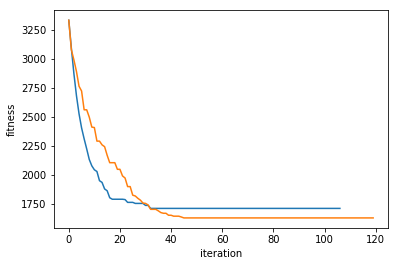

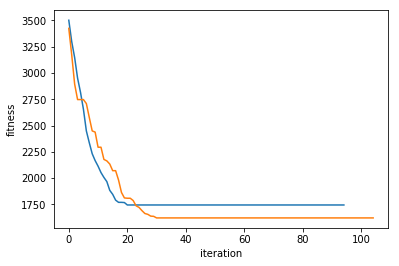

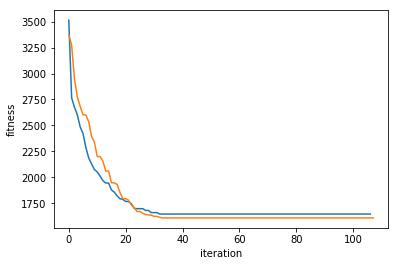

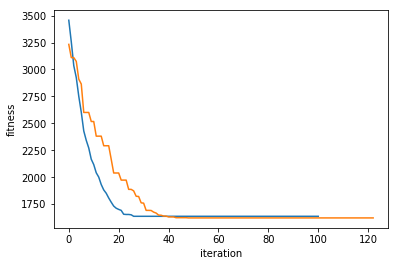

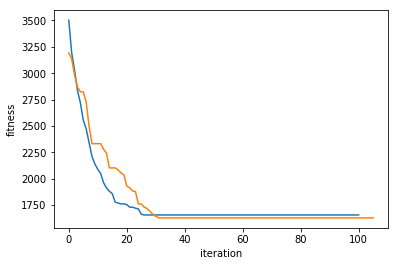

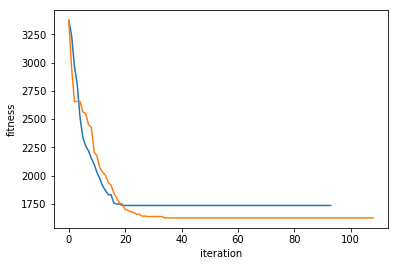

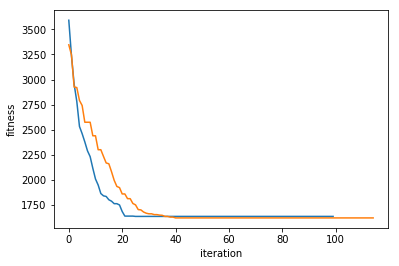

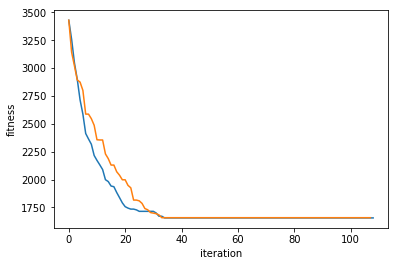

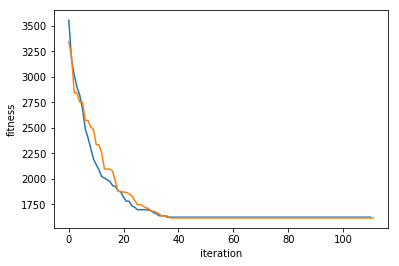

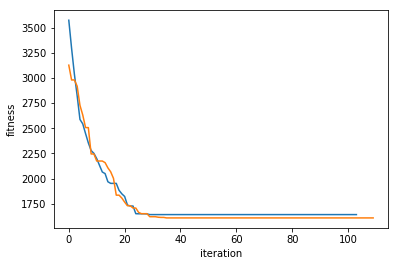

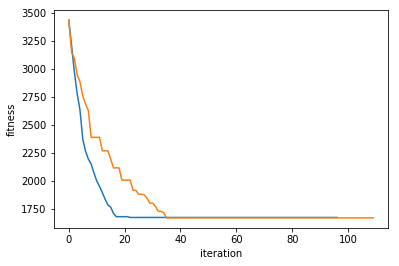

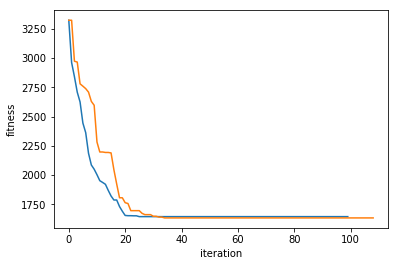

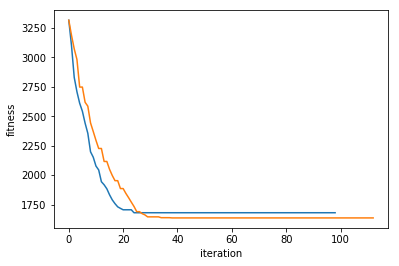

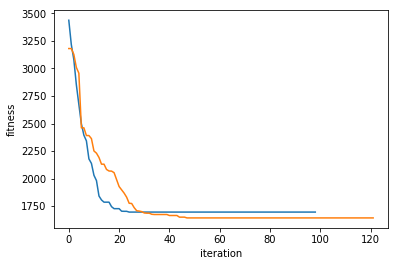

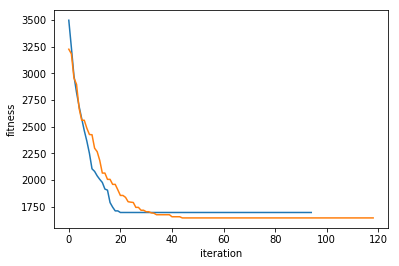

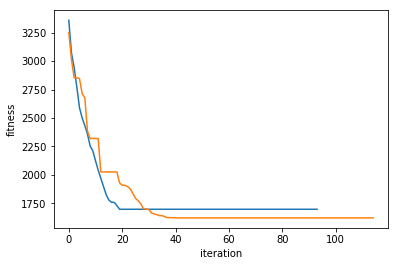

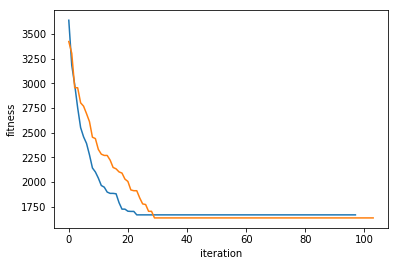

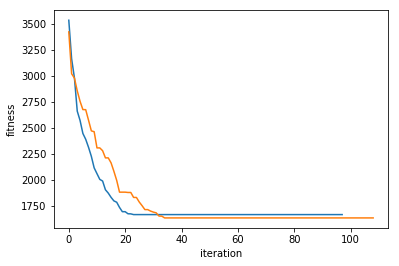

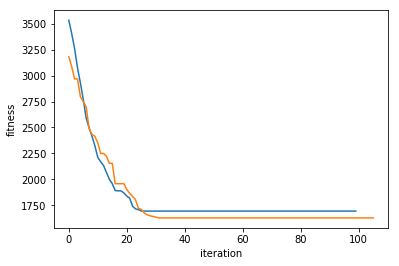

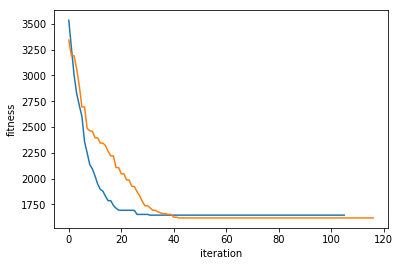

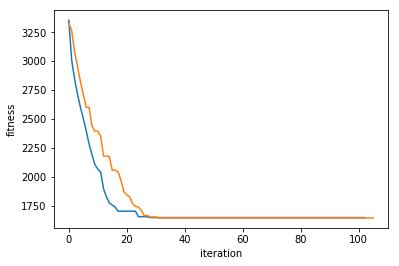

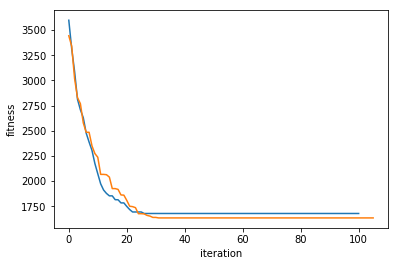

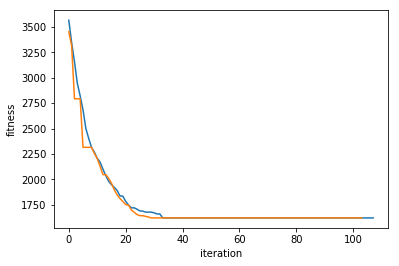

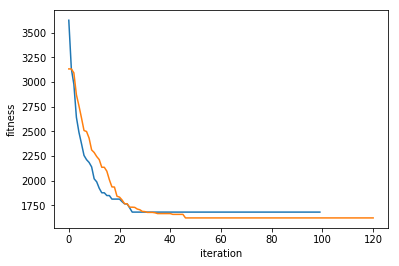

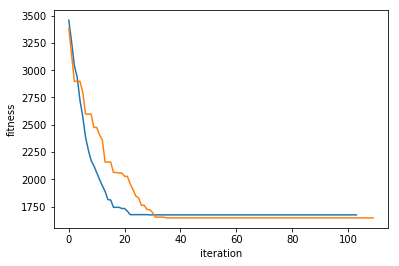

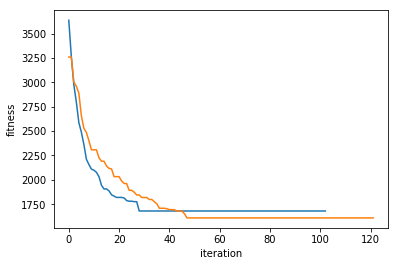

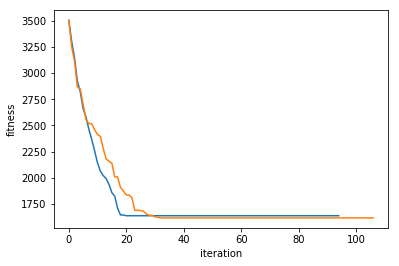

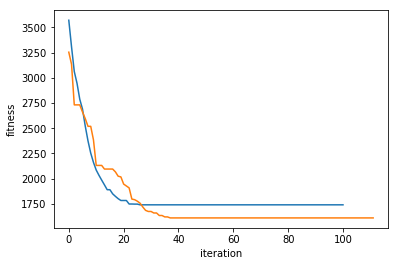

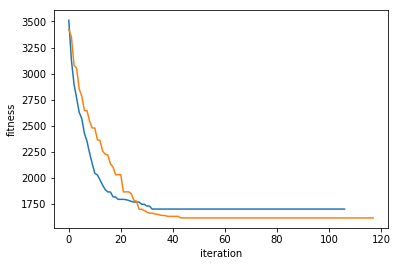

In [ ]:


finalBestTournament=[]
finalBestRoullete=[]

for i in range(1000):
    initialPopulation=getInitialPopulation(numberOfCities,initialPopulationCount)
    roulettePopulation=initialPopulation
    tournamentPopulation=initialPopulation
    rouletteBestfits=[]
    tournamentBestFits=[]
    tournamentCounter=0
    rouletteCounter=0

    while tournamentCounter<maxFrozenIteration or rouletteCounter<maxFrozenIteration:
        roulettePopulation=rouletteGeneration(roulettePopulation,elitismSetSize)
        tournamentPopulation=tournamentGeneration(tournamentPopulation,elitismSetSize)

        rouletteFits=[fitness(popula) for popula in roulettePopulation]
        tournamentFits=[fitness(popula) for popula in tournamentPopulation]

        theRouletteBest=-max(rouletteFits)
        theTournamentBest=-max(tournamentFits)

        if(len(rouletteBestfits)>0 and theRouletteBest==rouletteBestfits[-1]):
            rouletteCounter+=1 
        else:
            rouletteCounter=0

        if(len(tournamentBestFits)>0 and theTournamentBest==tournamentBestFits[-1]):
            tournamentCounter+=1 
        else:
            tournamentCounter=0

        if rouletteCounter<maxFrozenIteration : rouletteBestfits.append(theRouletteBest)
        if tournamentCounter<maxFrozenIteration : tournamentBestFits.append(-max(tournamentFits))

    finalBestTournament.append(max(tournamentPopulation,key=fitness))
    finalBestRoullete.append(max(roulettePopulation,key=fitness))
    
    plt.plot(rouletteBestfits)
    plt.plot(tournamentBestFits)
    plt.ylabel('fitness')
    plt.xlabel('iteration')
    plt.show()
